In [2]:
import numpy as np
from ultralytics import YOLO


side_keypoint_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/side_keypoint_model/last.pt")  # load a custom mode
rear_keypoint_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/rear_keypoint_model/last.pt")  # load a custom mode
side_segmentation_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/side_segmentation_model/last.pt")  # load a custom mode
rear_segmentation_model = YOLO("/Users/aftaabhussain/Work/Cattle-weight/YOLO Models/rear_segmentation_model/last.pt")  # load a custom mode
# Predict with the model
side_image = "/Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg"
rear_image = "/Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01.jpeg"

In [11]:
def infer(model, image, filename="result side keypoint.jpg"):
    results = model(image)
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        obb = result.obb  # Oriented boxes object for OBB outputs
        # print(result.masks)
        result.show()  # display to screen
        result.save(filename="result side keypoint.jpg")
        

In [12]:
infer(side_keypoint_model, side_image, filename="result side keypoint.jpg")
infer(rear_keypoint_model, rear_image, filename="result rear keypoint.jpg")
infer(side_segmentation_model, side_image, filename="result side segmentation.jpg")
infer(rear_segmentation_model, rear_image, filename="result rear segmentation.jpg")

image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg: 480x640 1 cow, 186.0ms
Speed: 9.5ms preprocess, 186.0ms inference, 14.1ms postprocess per image at shape (1, 3, 480, 640)
image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01.jpeg: 640x480 1 cow, 321.3ms
Speed: 7.5ms preprocess, 321.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01 (1).jpeg: 480x640 1 cattle, 208.3ms
Speed: 3.3ms preprocess, 208.3ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)
image 1/1 /Users/aftaabhussain/Work/Cattle-weight/WhatsApp Image 2024-06-04 at 09.27.01.jpeg: 640x480 1 cattle, 396.6ms
Speed: 7.0ms preprocess, 396.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 480)


image 1/1 /Users/aftaabhussain/Work/yolo segmentation/B4/data/images/train/284_b4-2_s_140_F.jpg: 480x640 1 sticker, 1 cattle, 214.6ms
Speed: 9.0ms preprocess, 214.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


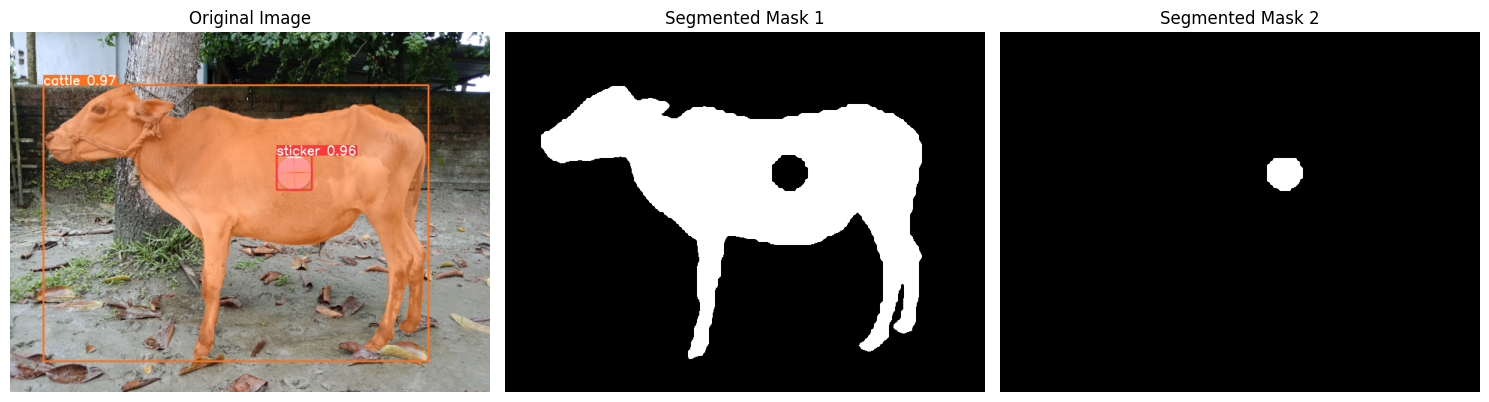

In [3]:
import matplotlib.pyplot as plt 
import cv2
# # Define the path to the validation images
# valid_images_path = os.path.join(dataset_path, 'valid', 'images')
# 
# # List all jpg images in the directory
# image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]
# 
# # Select a sample image
# selected_image = image_files[45]

# Perform inference on the selected image
image_path = "/Users/aftaabhussain/Work/yolo segmentation/B4/data/images/train/284_b4-2_s_140_F.jpg"
# image_path = rear_image
results = side_segmentation_model.predict(source=image_path, imgsz=640, conf=0.9)
annotated_image = results[0].plot()
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Determine the number of subplots needed (1 original + number of masks)
num_subplots = 1 + (len(results[0].masks.data) if results[0].masks is not None else 0)

# Initialize the subplot with 1 row and n columns
fig, axes = plt.subplots(1, num_subplots, figsize=(15, 5))

# Display the original annotated image
axes[0].imshow(annotated_image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# If multiple masks, iterate and display each mask
if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()
    for i, mask in enumerate(masks):
        # Threshold the mask to make sure it's binary
        # Any value greater than 0 is set to 255, else it remains 0
        binary_mask = (mask > 0).astype(np.uint8) * 255
        axes[i+1].imshow(binary_mask, cmap='gray')
        axes[i+1].set_title(f'Segmented Mask {i+1}')
        axes[i+1].axis('off')

# Adjust layout and display the subplot
plt.tight_layout()
plt.show()

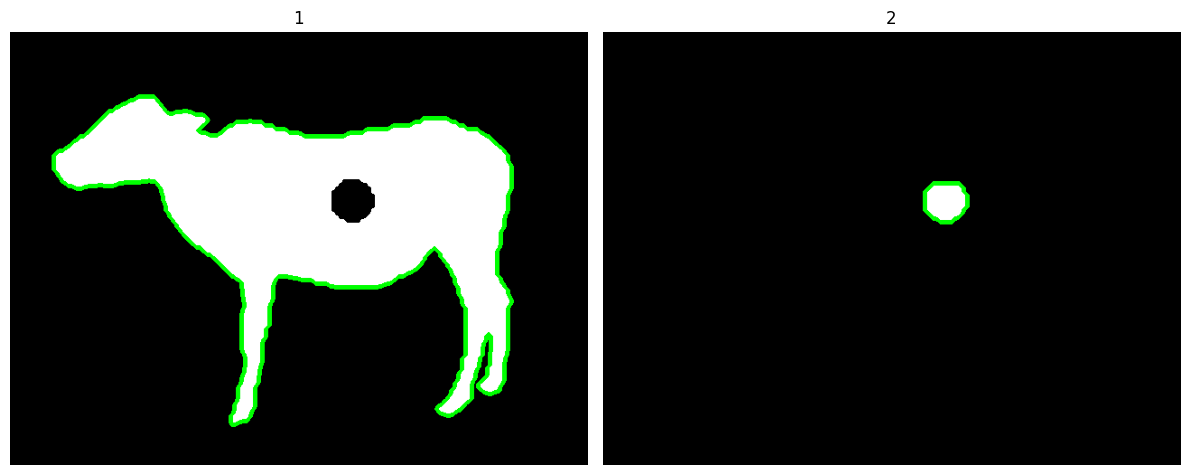

Area of cattle is 79182.0
Area of sticker is 1676.5
total area of image is 307200


In [4]:
# Initialize variables to hold total area and individual areas
total_area = 0
area_list = []

# Set up the subplot for displaying masks
fig, axes = plt.subplots(1, len(masks), figsize=(12, 8))

# Perform operations if masks are available
if results[0].masks is not None:
    masks = results[0].masks.data.cpu().numpy()   # Retrieve masks as numpy arrays
    image_area = masks.shape[1] * masks.shape[2]  # Calculate total number of pixels in the image
    for i, mask in enumerate(masks):
        binary_mask = (mask > 0).astype(np.uint8) * 255  # Convert mask to binary
        color_mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)  # Convert binary mask to color
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # Find contours in the binary mask
        contour = contours[0]  # Retrieve the first contour
        area = cv2.contourArea(contour)  # Calculate the area of the pothole
        area_list.append(area)  # Append area to the list
        cv2.drawContours(color_mask, [contour], -1, (0, 255, 0), 3)  # Draw the contour on the mask

        # Display the mask with the green contour
        axes[i].imshow(color_mask)
        axes[i].set_title(f'{i+1}')
        axes[i].axis('off')

# Display all masks
plt.tight_layout()
plt.show()
print(f"Area of cattle is {area_list[0]}")
print(f"Area of sticker is {area_list[1]}")
print(f"total area of image is {image_area}")
# Calculate and print areas after displaying the images
# for i, area in enumerate(area_list):
#     print(f"Area of Pothole {i+1}: {area} pixels")  
#     total_area += area  # Sum the areas for total

# # Calculate and print the total damaged area and percentage of road damaged by potholes
# print("-"*50)
# print(f"Total Damaged Area by Potholes: {total_area} pixels")
# print(f"Total Pixels in Image: {image_area} pixels")
# print(f"Percentage of Road Damaged: {(total_area / image_area) * 100:.2f}%")

In [30]:
results[0].masks.xy

[array([[     679.84,      130.62],
        [     676.88,      133.59],
        [     676.88,      148.44],
        ...,
        [     792.66,      133.59],
        [     748.12,      133.59],
        [     745.16,      130.62]], dtype=float32)]

In [5]:
side_img = "/Users/aftaabhussain/Work/Data Accumulator and prediction/Images/Side/41_b4-2_s_195_F.jpg"

In [14]:
file_name = side_img.split("/")[-1]

In [15]:
file_name

'41_b4-2_s_195_F.jpg'

In [9]:
file_name = file_name[:-4]

In [16]:
file_name

'41_b4-2_s_195_F.jpg'

In [17]:
file_name = file_name.split('_')

In [18]:
weight = file_name[-2]

In [19]:
weight

'195'

In [22]:
predicted_cattle_weight = 233.61332899062384
sticker = 997.0
cattle = 85211.0
status = ""
if(cattle/sticker<50):
    predicted_cattle_weight= predicted_cattle_weight-(cattle/sticker)*0.68
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<55):
    predicted_cattle_weight= predicted_cattle_weight-(cattle/sticker)*0.57
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<60):
    predicted_cattle_weight= predicted_cattle_weight-(cattle/sticker)*0.48
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<65):
    predicted_cattle_weight= predicted_cattle_weight-(cattle/sticker)*0.40
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<67):
    predicted_cattle_weight= predicted_cattle_weight-(cattle/sticker)*0.28
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<70):
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<72):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*0.25
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<75):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*0.35
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<80):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*0.45
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<85):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*0.55
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<90):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*0.65
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<95):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*0.75
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<100):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*0.85
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<105):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*0.95
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<110):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.05
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<115):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.15
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<120):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.25
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<125):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.35
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<130):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.45
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<135):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.55
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<140):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.65
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}


elif(cattle/sticker<145):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.75
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status} 


elif(cattle/sticker<150):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*1.95
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}


elif(cattle/sticker<155):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.05
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}


elif(cattle/sticker<160):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.20
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<165):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.35
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<170):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.45
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<180):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.55
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<190):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.65
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<200):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.75
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<210):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.85
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<220):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*2.95
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}

elif(cattle/sticker<230):
    predicted_cattle_weight= predicted_cattle_weight+(cattle/sticker)*3.05
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}


else:
    predicted_cattle_weight= 0
    status = "Sorry! This cattle can't be handled right now."
    res = {"weight":predicted_cattle_weight,"ratio": cattle/sticker ,"remarks":status}



In [23]:
res

{'weight': 289.16714042492674, 'ratio': 85.46740220661987, 'remarks': ''}